# Módulo Visualização de Dados:

Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.

Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_file_path = "/content/drive/MyDrive/Colab Notebooks/ecommerce_preparados.csv"

In [ ]:
df = pd.read_csv(csv_file_path, delimiter=",")

print(df.head().to_string())

   Unnamed: 0                                                        Título  Nota  N_Avaliações  Desconto                            Marca   Material      Gênero        Temporada                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Review1                                                                                                                                                                                                                                                                                                                                        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2199 non-null   int64  
 1   Título               2199 non-null   object 
 2   Nota                 1559 non-null   float64
 3   N_Avaliações         1559 non-null   float64
 4   Desconto             874 non-null    float64
 5   Marca                2199 non-null   object 
 6   Material             1332 non-null   object 
 7   Gênero               2120 non-null   object 
 8   Temporada            2199 non-null   object 
 9   Review1              1515 non-null   object 
 10  Review2              1354 non-null   object 
 11  Review3              1233 non-null   object 
 12  Qtd_Vendidos         2199 non-null   object 
 13  Preço                1964 non-null   float64
 14  Nota_MinMax          1559 non-null   float64
 15  N_Avaliações_MinMax  1559 non-null   f

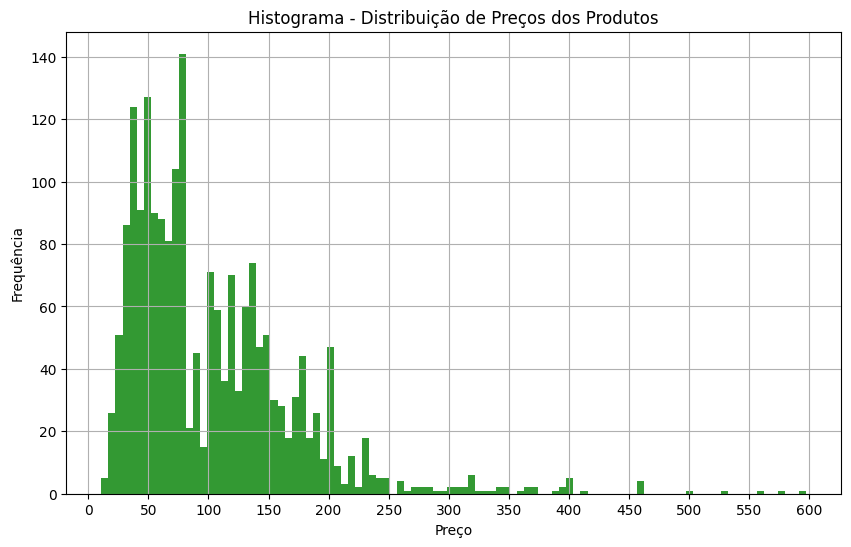

In [77]:
# Gráfico de Histograma
plt.figure(figsize=(10, 6))
plt.hist(df["Preço"], bins=100, color="green", alpha=0.8)
plt.title("Histograma - Distribuição de Preços dos Produtos")
plt.xlabel("Preço")
plt.xticks(ticks=range(0, int(df["Preço"].max())+50, 50)) #valor máximo + R$50 em incrementos de R$50
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

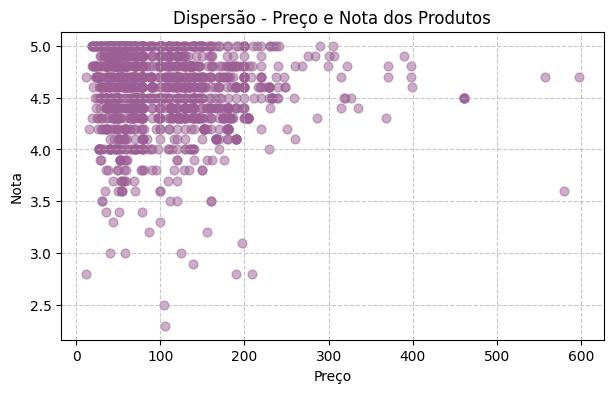

In [109]:
# Gráfico de Dispersão
plt.figure(figsize=(7, 4))
plt.scatter(df["Preço"], df["Nota"], color="#9C5F95", alpha=0.5, s=40)
plt.title("Dispersão - Preço e Nota dos Produtos")
plt.xlabel("Preço")
plt.ylabel("Nota")
plt.grid(True, linestyle='--', alpha=0.7) # aplicação grid trastejado com transparência de 0.7
plt.show()

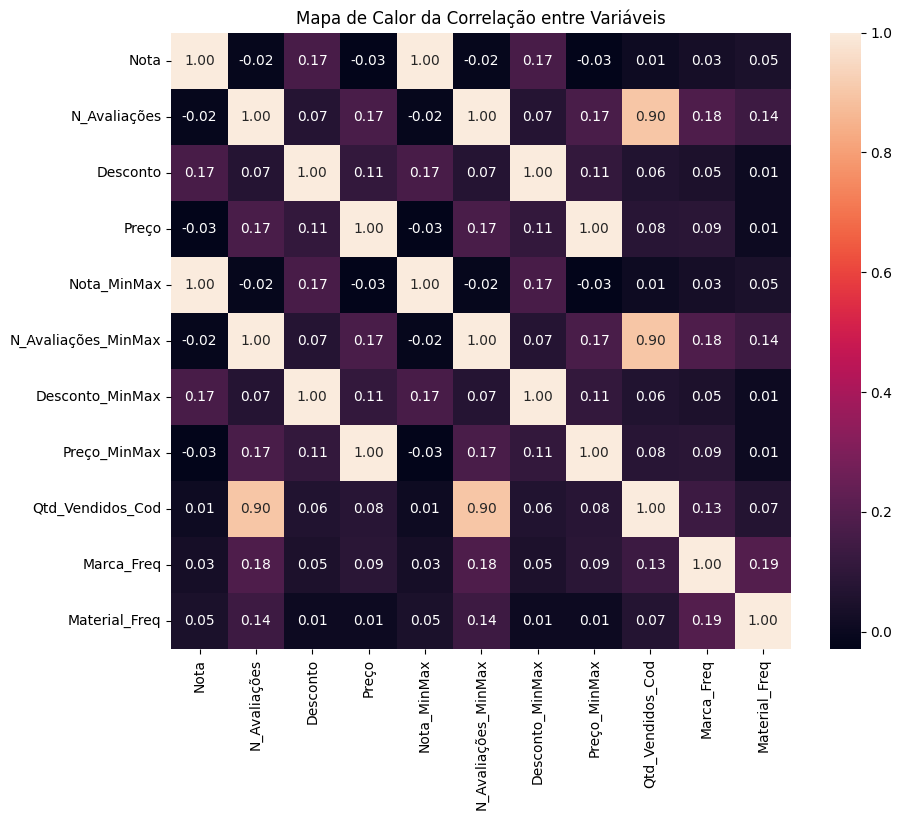

In [122]:
# Mapa de Calor
df_corr = df[["Nota", "N_Avaliações", "Desconto", "Preço",
                 "Nota_MinMax", "N_Avaliações_MinMax", "Desconto_MinMax",
                 "Preço_MinMax", "Qtd_Vendidos_Cod", "Marca_Freq", "Material_Freq"]].corr() # todas as variáveis quantitativas float
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, fmt=".2f")
plt.title("Mapa de Calor da Correlação entre Variáveis")
plt.show()

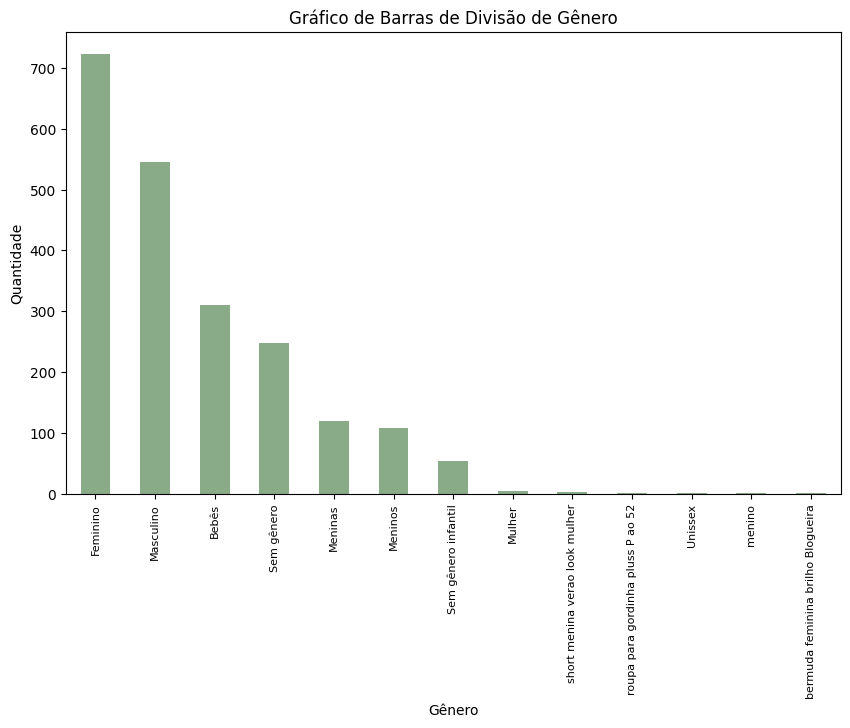

In [116]:
# Gráfico de Barras
plt.figure(figsize=(10, 6))
df["Gênero"].value_counts().plot(kind="bar", color="#89AB88")
plt.title("Gráfico de Barras de Divisão de Gênero")
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
plt.xticks(rotation=90, fontsize=8)
plt.show()

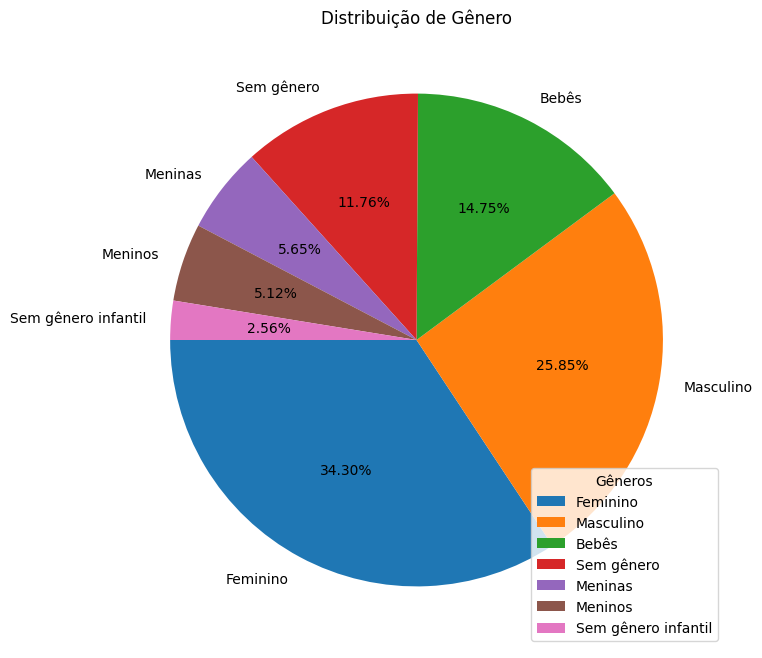

In [93]:
# Gráfico de Pizza
x = df["Gênero"].value_counts().index
y = df["Gênero"].value_counts().values

# Dados abaixo de 2% ficam sobrepostos na plotagem, então ajustei o código conforme abaixo para não apresentar dados abaixo de 2%.
percentual = (y / y.sum()) * 100
x_filtrado = x[percentual >= 2]
y_filtrado = y[percentual >= 2]

plt.figure(figsize=(10, 8))
plt.pie(y_filtrado, labels=x_filtrado, autopct="%.2f%%", startangle=180)
plt.title("Distribuição de Gênero")
plt.legend(title="Gêneros", loc="lower right") # legenda apresentada no canto direito inferior
plt.show()

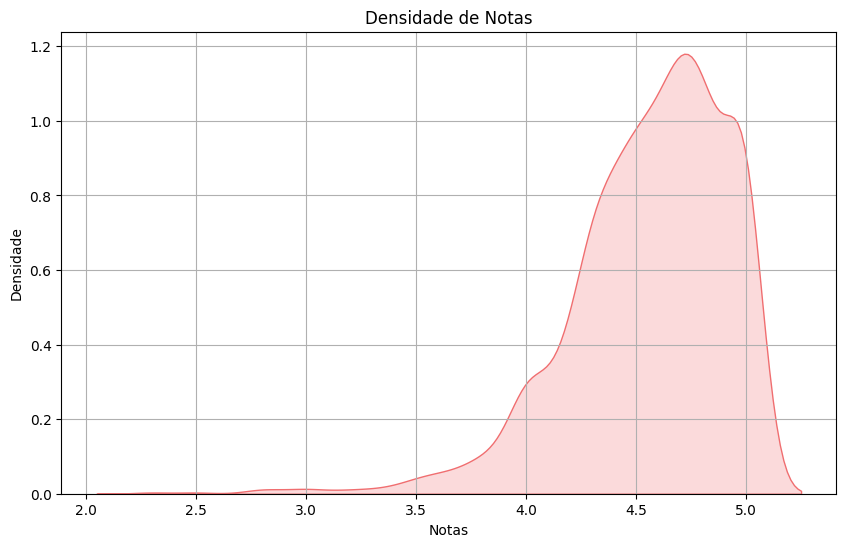

In [118]:
# Gráfico de Densidade
plt.figure(figsize=(10, 6))
sns.kdeplot(df["Nota"], fill=True, color="#F06E70")
plt.title("Densidade de Notas")
plt.xlabel("Notas")
plt.ylabel("Densidade")
plt.grid(True)
plt.show()

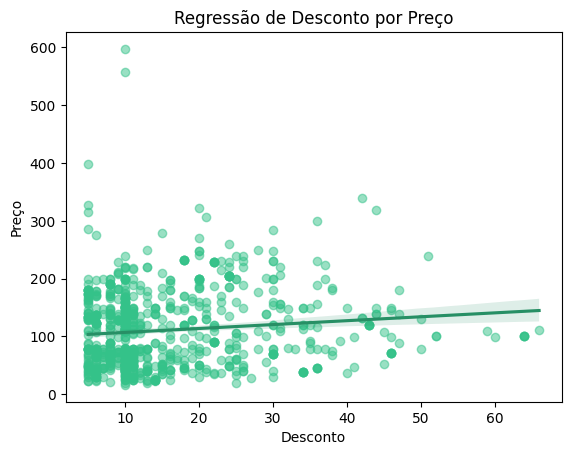

In [121]:
# Gráfico de Regressão
sns.regplot(x="Desconto", y="Preço", data=df, color="#278f65", scatter_kws={"alpha": 0.5, "color": "#34c289"})
plt.title("Regressão de Desconto por Preço")
plt.xlabel("Desconto")
plt.ylabel("Preço")
plt.show()